In [1]:
import os, sys
import os.path as osp
root_dir = osp.dirname(osp.dirname(os.getcwd()))
package_dir = osp.join(root_dir, 'src')
sys.path.append(package_dir)
from ml_modules.data.datasets import DeepSTABp_Dataset
from ml_modules.data.transforms import norm_0to1

import torch
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)
plt.rcParams.update({'figure.autolayout': True})

dataset = DeepSTABp_Dataset(
    experiment='lysate',
    organism=None,
    cell_line=None,
    version='v3-ogt',
    transform=None
)
dataset_trans = DeepSTABp_Dataset(
    experiment='lysate',
    organism=None,
    cell_line=None,
    version='v3-ogt',
    transform=norm_0to1
)
Tm_dict = dataset.Tm_dict

ogt2idx = {
    3:  0,
    20: 1,
    22: 2,
    25: 3,
    28: 4,
    32: 5,
    37: 6,
    55: 7,
    60: 8,
    70: 9,
}
cm = plt.get_cmap('gist_rainbow')

edge_types = ['backbone', 'codir', 'pae', 'coord', 'contact', 'deform']

 -> Generating dataset from c:\Users\yenlin\Dropbox\projects\ai-thermostability\code\data\collation\DeepSTABp\lysate.csv
 -> Number of entries in meta file    : 29757
     >> mean value of Tm  : 49.8242
     >> range of Tm       : 30.4417-92.5729
 -> Number of unique accessions       : 29757
 -> Final number of accessions        : 20255
     >> mean value of Tm: 50.4288
     >> range of Tm     : 30.4417-92.5729
 -> Number of unique accessions       : 20255
Dataset instantiation complete.
 -> Generating dataset from c:\Users\yenlin\Dropbox\projects\ai-thermostability\code\data\collation\DeepSTABp\lysate.csv
 -> Number of entries in meta file    : 29757
     >> mean value of Tm  : 49.8242
     >> range of Tm       : 30.4417-92.5729
 -> Number of unique accessions       : 29757
 -> Final number of accessions        : 20255
     >> mean value of Tm: 50.4288
     >> range of Tm     : 30.4417-92.5729
 -> Number of unique accessions       : 20255
Dataset instantiation complete.


In [2]:
# GATHER ALL REQUIRED INFORMATION

all_Tm = []
all_ogt = []
all_seq_length = []
pLDDT_by_protein = []
bfactors_by_protein = []
edge_count = {edge_type: [] for edge_type in edge_types}

pbar = tqdm(dataset)
for i, data in enumerate(pbar):
    pbar.set_description(data['accession'])

    all_Tm.append(Tm_dict[data['accession']])
    all_ogt.append(data.ogt)
    all_seq_length.append(data['residue'].num_nodes)
    pLDDT_by_protein.append(data['residue'].pLDDT.tolist())
    bfactors_by_protein.append(data['residue'].bfactor.tolist())
    
    for edge_type in edge_types:
        edge_count[edge_type].append(
            data['residue', edge_type, 'residue'].edge_index.shape[1]/2
        )

all_pLDDT = [e for protein in pLDDT_by_protein for e in protein]
all_bfactors = [e for protein in bfactors_by_protein for e in protein]

all_pLDDT_mean = [np.mean(e) for e in pLDDT_by_protein]
all_pLDDT_max = [np.max(e) for e in pLDDT_by_protein]
all_pLDDT_min = [np.min(e) for e in pLDDT_by_protein]
all_bfactor_mean = [np.mean(e) for e in bfactors_by_protein]
all_bfactor_max = [np.max(e) for e in bfactors_by_protein]
all_bfactor_min = [np.min(e) for e in bfactors_by_protein]

  0%|          | 0/20255 [00:00<?, ?it/s]

In [34]:
# # GATHER ALL REQUIRED INFORMATION (TRANSFORMED)

# pLDDT_trans_by_protein = []
# bfactors_trans_by_protein = []

# pbar = tqdm(dataset_trans)
# for i, data in enumerate(pbar):
#     pbar.set_description(data['accession'])
#     pLDDT_trans_by_protein.append(data['residue'].pLDDT.tolist())
#     bfactors_trans_by_protein.append(data['residue'].bfactor.tolist())


# all_pLDDT_trans = [e for protein in pLDDT_trans_by_protein for e in protein]
# all_bfactors_trans = [e for protein in bfactors_trans_by_protein for e in protein]

# all_pLDDT_trans_mean = [np.mean(e) for e in pLDDT_trans_by_protein]
# all_pLDDT_trans_max = [np.max(e) for e in pLDDT_trans_by_protein]
# all_pLDDT_trans_min = [np.min(e) for e in pLDDT_trans_by_protein]
# all_bfactor_trans_mean = [np.mean(e) for e in bfactors_trans_by_protein]
# all_bfactor_trans_max = [np.max(e) for e in bfactors_trans_by_protein]
# all_bfactor_trans_min = [np.min(e) for e in bfactors_trans_by_protein]

  0%|          | 0/20255 [00:00<?, ?it/s]

In [3]:
# sort entries by ogt

sorted_idx = np.argsort(all_ogt)

all_Tm = np.array(all_Tm)[sorted_idx]
all_ogt = np.array(all_ogt)[sorted_idx]
all_seq_length = np.array(all_seq_length)[sorted_idx]

pLDDT_by_protein = [pLDDT_by_protein[i] for i in sorted_idx]
bfactors_by_protein = [bfactors_by_protein[i] for i in sorted_idx]

edge_count = {
    edge_type: np.array(edge_count[edge_type])[sorted_idx]
    for edge_type in edge_types
}

all_pLDDT_mean = np.array(all_pLDDT_mean)[sorted_idx]
all_pLDDT_max = np.array(all_pLDDT_max)[sorted_idx]
all_pLDDT_min = np.array(all_pLDDT_min)[sorted_idx]
all_bfactor_mean = np.array(all_bfactor_mean)[sorted_idx]
all_bfactor_max = np.array(all_bfactor_max)[sorted_idx]
all_bfactor_min = np.array(all_bfactor_min)[sorted_idx]

In [ ]:
edge_count['pae']

In [6]:
save = True

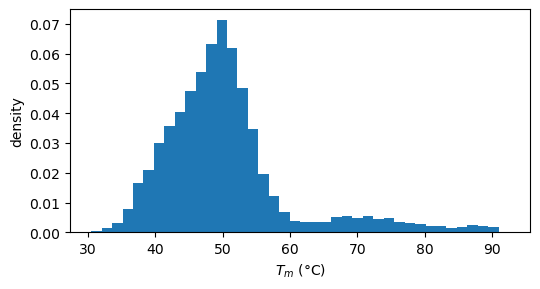

In [46]:
# Tm

plt.figure(figsize=(5.5, 3))

plt.hist(all_Tm, bins=40, density=True)
plt.xlabel(r'$T_m$ (°C)')
plt.ylabel('density')

if save:
    plt.savefig('Tm_hist.png', dpi=300)#, bbox_inches='tight')
plt.show()
plt.close()

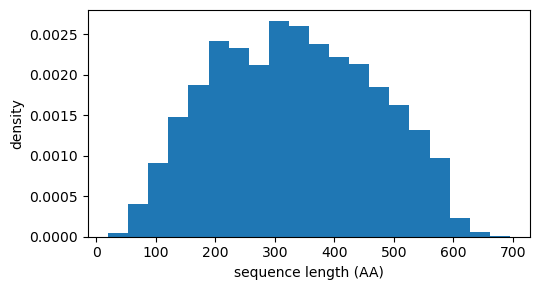

In [7]:
# seq length

plt.figure(figsize=(5.5, 3))

plt.hist(all_seq_length, bins=20, density=True)
plt.xlabel('sequence length (AA)')
plt.ylabel('density')

if save:
    plt.savefig('seq_len_hist.png', dpi=300)
plt.show()
plt.close()

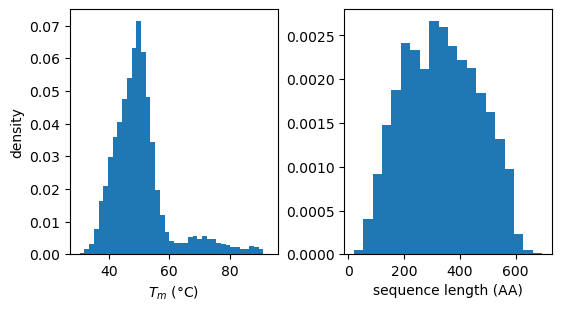

In [47]:
# Tm and seq length

fig, ax = plt.subplots(
    1, 2, sharex=False, sharey=False, figsize=(5.5,3), layout='compressed'
)
ax = ax.flatten()

# Tm
ax[0].hist(all_Tm, bins=40, density=True)
ax[0].set_xlabel(r'$T_m$ (°C)')
ax[0].set_ylabel('density')
# ax[0].grid()

# seq length
ax[1].hist(all_seq_length, bins=20, density=True)
ax[1].set_xlabel('sequence length (AA)')
# ax[1].set_ylabel('density')
# ax[1].grid()

if save:
    plt.savefig('Tm_hist-len_hist.png', dpi=300)#, bbox_inches='tight')
plt.show()
plt.close()

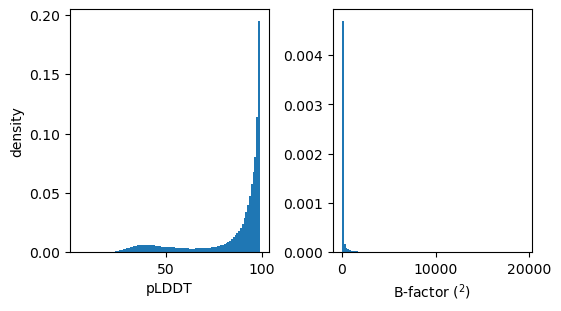

In [41]:
# pLDDT an b-factors

fig, ax = plt.subplots(
    1, 2, sharex=False, sharey=False, figsize=(5.5,3), layout='compressed'
)
ax = ax.flatten()

# b-factors
ax[0].hist(all_pLDDT, bins=100, density=True)
ax[0].set_xlabel('pLDDT')
ax[0].set_ylabel('density')
# ax[0].grid()

# pLDDT
ax[1].hist(all_bfactors, bins=100, density=True)
ax[1].set_xlabel(r'B-factor ($^2$)')
# ax[1].set_ylabel('density')
# ax[1].grid()

if save:
    plt.savefig('pLDDT_hist-bfactor_hist.png', dpi=300)#, bbox_inches='tight')
plt.show()
plt.close()

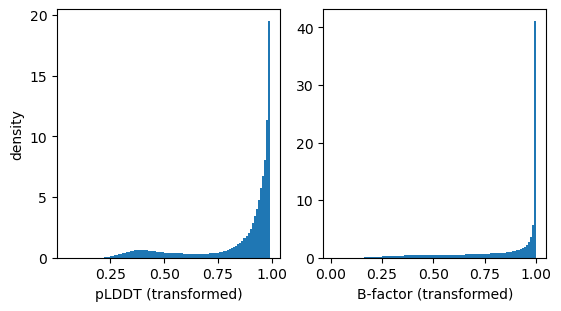

In [42]:
# pLDDT an b-factors

fig, ax = plt.subplots(
    1, 2, sharex=False, sharey=False, figsize=(5.5,3), layout='compressed'
)
ax = ax.flatten()

# b-factors
ax[0].hist(all_pLDDT_trans, bins=100, density=True)
ax[0].set_xlabel('pLDDT (transformed)')
ax[0].set_ylabel('density')
# ax[0].grid()

# pLDDT
ax[1].hist(all_bfactors_trans, bins=100, density=True)
ax[1].set_xlabel('B-factor (transformed)')
# ax[1].set_ylabel('density')
# ax[1].grid()

if save:
    plt.savefig(
        'pLDDT_transformed_hist-bfactor_transformed_hist.png',
        dpi=300#, bbox_inches='tight'
    )
plt.show()
plt.close()

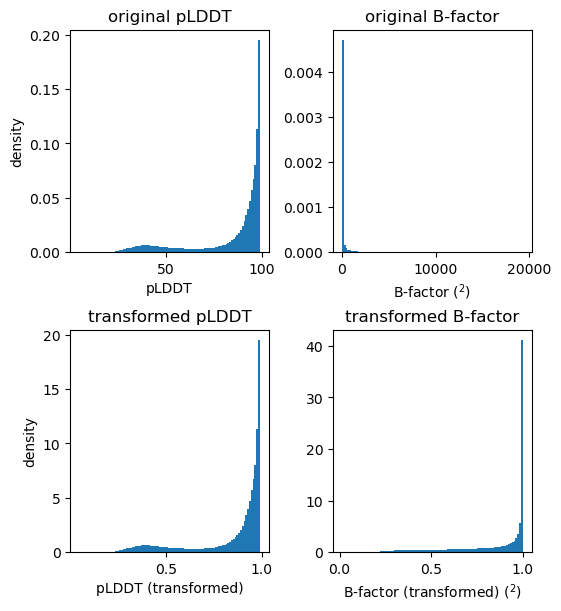

In [43]:
# pLDDT an b-factors

fig, ax = plt.subplots(
    2, 2, sharex=False, sharey=False, figsize=(5.5,6), layout='compressed'
)
ax = ax.flatten()

# original b-factors
ax[0].hist(all_pLDDT, bins=100, density=True)
ax[0].set_title('original pLDDT')
ax[0].set_xlabel('pLDDT')
ax[0].set_ylabel('density')
# ax[0].grid()

# original pLDDT
ax[1].hist(all_bfactors, bins=100, density=True)
ax[1].set_title('original B-factor')
ax[1].set_xlabel(r'B-factor ($^2$)')

# transformed b-factors
ax[2].hist(all_pLDDT_trans, bins=100, density=True)
ax[2].set_title('transformed pLDDT')
ax[2].set_xlabel('pLDDT (transformed)')
ax[2].set_ylabel('density')

# transformed pLDDT
ax[3].hist(all_bfactors_trans, bins=100, density=True)
ax[3].set_title('transformed B-factor')
ax[3].set_xlabel(r'B-factor (transformed) ($^2$)')

if save:
    plt.savefig('pLDDT_hist-bfactor_hist-all.png', dpi=300)#, bbox_inches='tight')
plt.show()
plt.close()

  0%|          | 0/6 [00:00<?, ?it/s]

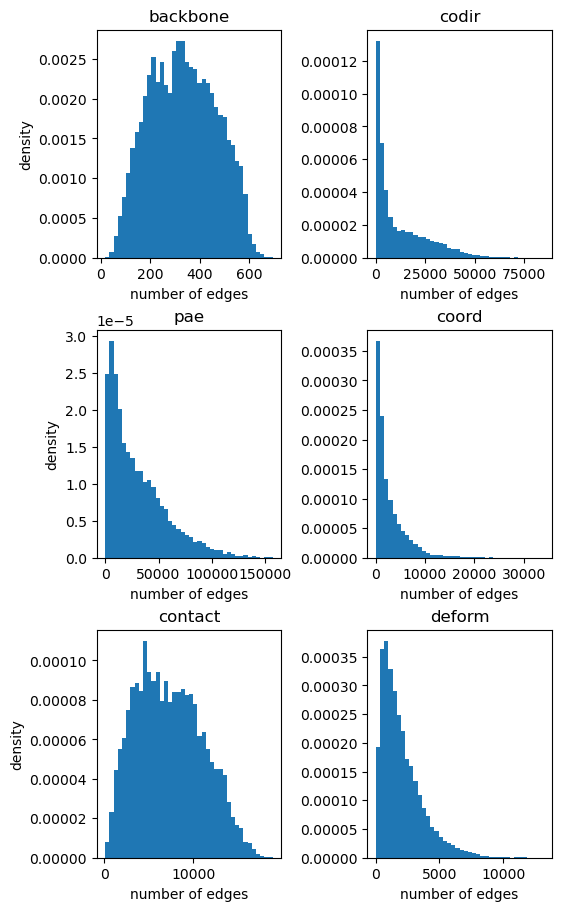

In [49]:

fig, ax = plt.subplots(
    3, 2, sharex=False, sharey=False, figsize=(5.5,9), layout='compressed'
)
ax = ax.flatten()

pbar = tqdm(edge_types)
for i, edge_type in enumerate(pbar):
    pbar.set_description(edge_type)

    ax[i].set_title(edge_type)

    ax[i].hist(edge_count[edge_type], bins=40, density=True)
    ax[i].set_xlabel('number of edges')
    if i%2 == 0:
        ax[i].set_ylabel('density')
    # ax[i].grid()

if save:
    plt.savefig('edge_types_hist.png', dpi=300)#, bbox_inches='tight')
plt.show()
plt.close()